In [1]:
#1.Data ingeston
#2.Eda of the data
#3.processing of the data
#4.model building
#5.model evalution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os,sys

In [3]:
df = pd.read_csv('E:\Pandas\TSLA.CSV')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [5]:
stock_data = df[['Date','Close']]

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
stock_data.set_index('Date',inplace=True)

In [12]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [13]:
"""
Data Ingestion
Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.
"""

'\nData Ingestion\nImport the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.\n\nLoad the Data.\n\nLoad the Time Series Data into a pandas dataframe.\n\nSet the datetime column as the index of the dataframe.\n\nCheck the datatype of the index and convert it to datetime if necessary.\n'

In [14]:
"""
why we are converting date column as a index column
i can easily retrive the data
visulization is also simple
those lib has been degine in such a way it required date column as a index(scipy statsmodel)
"""

'\nwhy we are converting date column as a index column\ni can easily retrive the data\nvisulization is also simple\nthose lib has been degine in such a way it required date column as a index(scipy statsmodel)\n'

In [15]:
"""EDA(exploratory data analysis)
Summary Statistics
Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.
Visualize the Time Series Data
Plot the Time Series data

Plot the rolling mean and rolling standard deviation of the Time Series data.

Decompose the Time Series Data check for any trends, seasonality, and Noise.

Plot the decomposed components to get a better understanding of the Time Series data.

Stationarity Check
Check for stationarity.
Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.
Outlier Detection
Detect and handle outliers using statistical methods or machine learning techniques.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

"""

'EDA(exploratory data analysis)\nSummary Statistics\nCompute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.\nVisualize the Time Series Data\nPlot the Time Series data\n\nPlot the rolling mean and rolling standard deviation of the Time Series data.\n\nDecompose the Time Series Data check for any trends, seasonality, and Noise.\n\nPlot the decomposed components to get a better understanding of the Time Series data.\n\nStationarity Check\nCheck for stationarity.\nCheck for stationarity of the Time Series data using the Augmented Dickey-Fuller test.\nCheck for Autocorrelation\nPlot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.\nOutlier Detection\nDetect and handle outliers using statistical methods or machine learning techniques.\nCheck for Autocorrelation\nPlot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of 

In [16]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


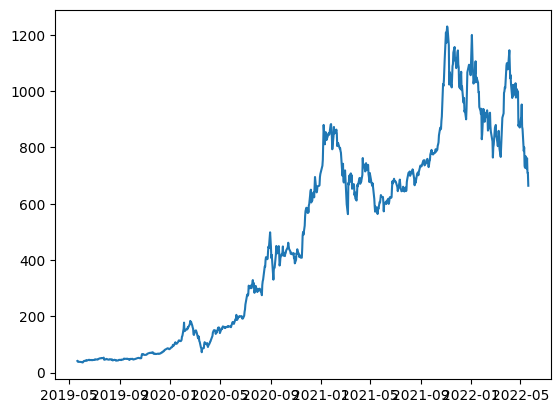

In [24]:
plt.plot(stock_data.Close)
plt.show()

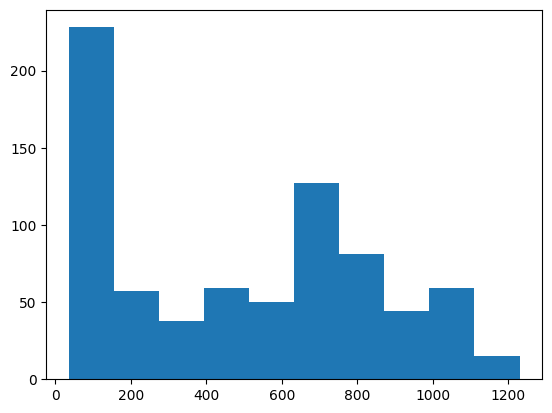

In [26]:
plt.hist(stock_data)
plt.show()

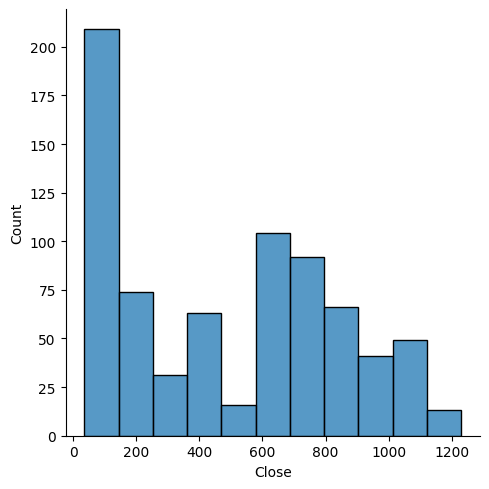

In [30]:
sns.displot(stock_data.Close)

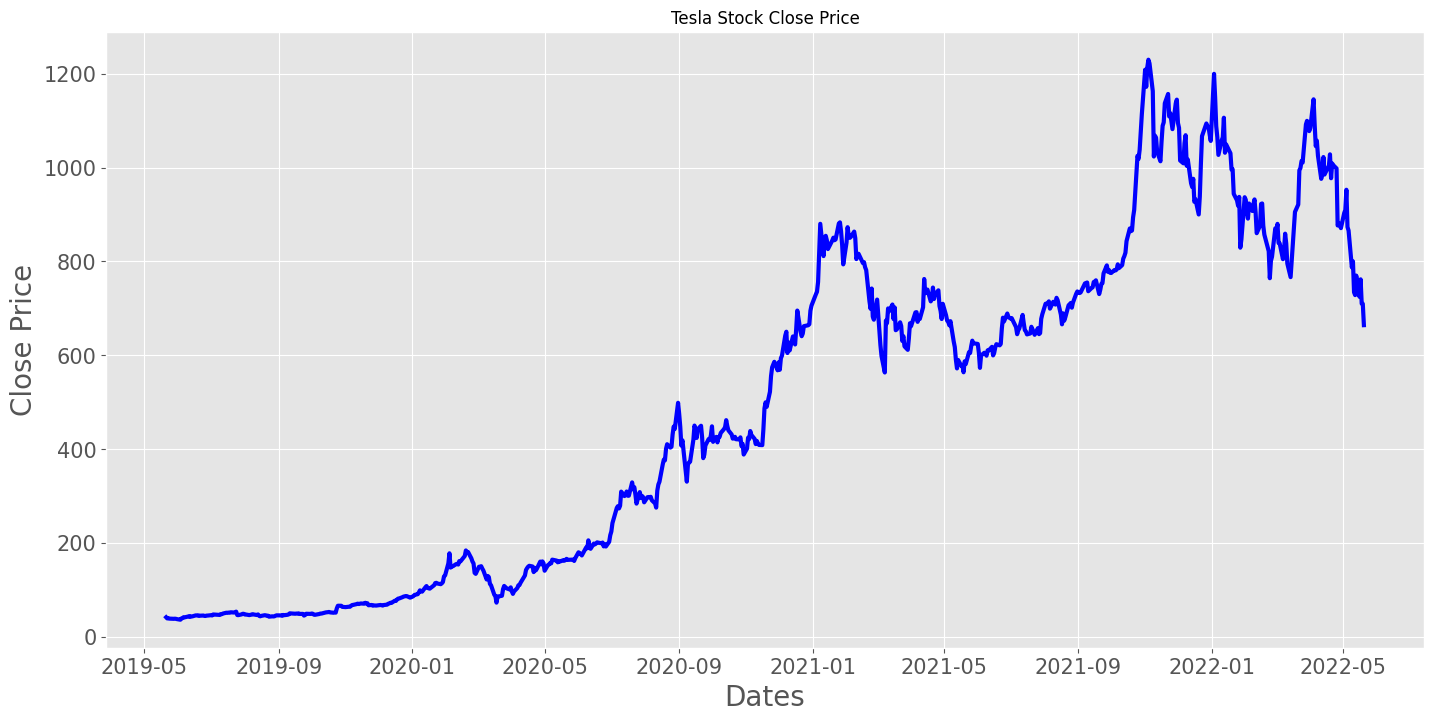

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(17,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],color='blue',linewidth=3)
plt.title('Tesla Stock Close Price',fontsize=12)
plt.show()

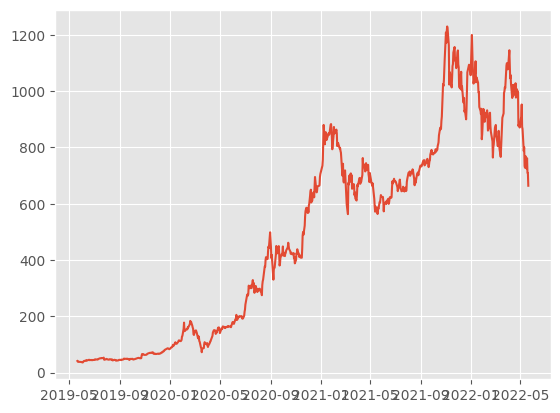

In [43]:
plt.plot(stock_data)

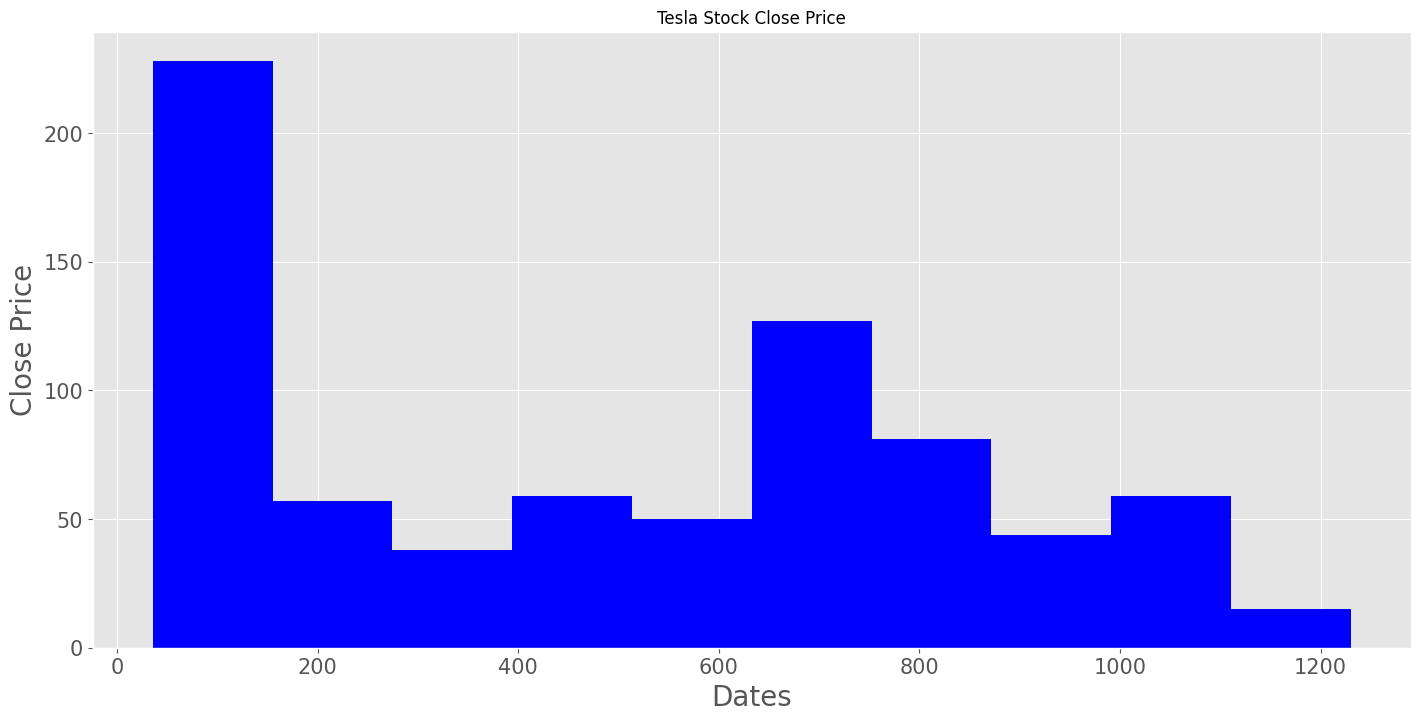

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(17,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],color='blue',linewidth=3)
plt.title('Tesla Stock Close Price',fontsize=12)
plt.show()

In [65]:
roll_mean = stock_data['Close'].rolling(365).mean()

In [66]:
stock_data['Close']

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [67]:
roll_std = stock_data['Close'].rolling(365).std()

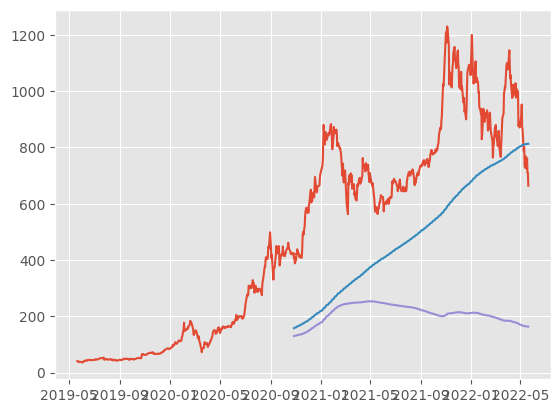

In [68]:
plt.plot(stock_data.Close)
plt.plot(roll_mean)
plt.plot(roll_std)